In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
Beton = np.array([24.4, 27.6, 27.8, 27.9, 28.5, 30.1, 30.3, 31.7, 32.2, 32.8, 33.3, 33.5, 34.1, 34.6, 35.8, 35.9, 36.8, 37.1, 39.2, 39.7])

In [4]:
Beton.mean()

32.665000000000006

In [5]:
Beton.std()

4.044660059881424

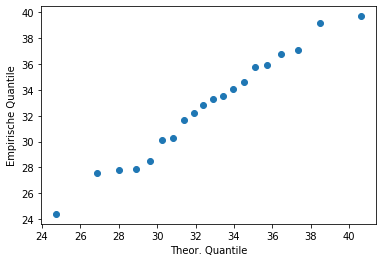

In [8]:
alphak = (np.arange(1, Beton.size + 1) - 0.5) / Beton.size
quantile_theor = st.norm.ppf(q=alphak, loc=Beton.mean(), scale=Beton.std())
quantile_empir = np.sort(Beton)
plt.xlabel("Theor. Quantile")
plt.ylabel("Empirische Quantile")
plt.plot(quantile_theor, quantile_empir, "o")
plt.show()

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([24.4, 27.6, 27.8, 27.9, 28.5, 30.1, 30.3, 31.7, 32.2, 32.8, 33.3,
         33.5, 34.1, 34.6, 35.8, 35.9, 36.8, 37.1, 39.2, 39.7])),
 (4.338493299839927, 32.665000000000006, 0.9923829304670189))

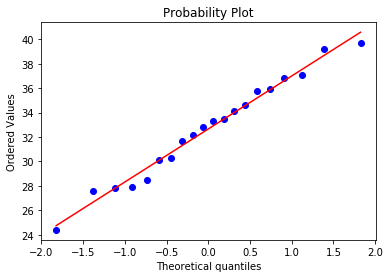

In [14]:
x = pd.Series([24.4, 27.6, 27.8, 27.9, 28.5, 30.1, 30.3, 31.7, 32.2, 32.8, 33.3, 33.5, 34.1, 34.6, 35.8, 35.9, 36.8, 37.1, 39.2, 39.7])
st.probplot(x, plot=plt)

---

# 4.3

In [5]:
methodeA = pd.Series([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])
methodeA.mean()

80.02076923076923

In [6]:
methodeA.std()

0.023965787580611863

### 4.3.3 Bsp

In [9]:
np.random.seed(1)
methodeA_sim1 = pd.Series(np.round(st.norm.rvs(size=6, loc=80, scale=0.02), 2))
methodeA_sim1

0    80.03
1    79.99
2    79.99
3    79.98
4    80.02
5    79.95
dtype: float64

In [10]:
methodeA_sim1.mean()

79.99333333333333

In [11]:
methodeA_sim1.std()

0.028751811537128993

In [14]:
np.random.seed(17)
for i in range(5):
    methodeA_sim1 = pd.Series(np.round(st.norm.rvs(size=6, loc=80, scale=0.02), 2))
    print("Mittelwert:", np.round(methodeA_sim1.mean(), 3))
    print("Standardabw.:", np.round(methodeA_sim1.std(), 3))
    print()

Mittelwert: 80.01
Standardabw.: 0.027

Mittelwert: 80.007
Standardabw.: 0.02

Mittelwert: 79.992
Standardabw.: 0.028

Mittelwert: 79.995
Standardabw.: 0.016

Mittelwert: 79.992
Standardabw.: 0.013



### 4.3.4 Bsp

In [15]:
np.random.seed(463137)
methodeA_sim2 = pd.Series(np.round(st.norm.rvs(size=6, loc=80, scale=0.02), 2))
methodeA_sim2

0    80.07
1    80.06
2    80.03
3    80.03
4    80.02
5    80.03
dtype: float64

In [16]:
methodeA_sim2.mean()

80.04

In [18]:
mAsim2 = methodeA_sim2.std()
print(mAsim2)

0.019999999999998862


In [20]:
StdFehler = mAsim2 / np.sqrt(6)
print(StdFehler)

0.008164965809276796


In [21]:
StdFehler*5

0.04082482904638398

## Teststatistik beweisen

Ist die Statistik mit Mittelwert 79.98 bei einer Annahme von Mittelwert 80 wahrscheinlich?

In [23]:
st.norm.cdf(x=79.98, loc=80, scale=0.02/np.sqrt(6))

0.007152939217724509

Aufteilung in 95% --> S. 156 Abbildung 4.8

In [27]:
st.norm.ppf(q=0.025, loc=80, scale=0.02/np.sqrt(6))

79.98399696107882

In [28]:
st.norm.ppf(q=0.975, loc=80, scale=0.02/np.sqrt(6))

80.01600303892118

---
### 4.3.16

In [31]:
x = pd.Series([5.9, 3.4, 6.6, 6.3, 4.2, 2.0, 6.0, 4.8, 4.2, 2.1, 8.7, 4.4, 5.1, 2.7, 8.5, 5.8, 4.9, 5.3, 5.5, 7.9])
x.std()

1.8838021462764578

In [32]:
x.mean()

5.215000000000001

geschätzte empirische Standardabweichung:

In [37]:
st.t.cdf(x=x.mean(), df=x.size-1, loc=5, scale=x.std()/np.sqrt(x.size))

0.6921780567888249